# Bernstein-Vazirani Algorithm
_A Beginner Friendly Quantum Computing Tutorial using Qiskit_

**Author**: Sanvi Nethikunta

**Team**: Superposition

<span style="font-size: 18px;">**Introduction**</span>

The **Bernstein-Vazirani (BV) Algorithm** is a quantum algorithm which was developed by Ethan Bernstein and Umesh Vazirani in 1992 designed to solve a special case of the _hidden shift problem_ (hidden string problem) more efficiently that classical computers. Given a black box function `f(x) = α ⋅ x (mod 2)`, where  `𝛼` is an unknown bit string and `⋅` is the bitwise dot product, the goal is to determine `𝛼`. A classical approach would need to query the function once for each bit of 𝛼, making the process take _n_ queries for _n_-bit string. The quantum version can find the unknown bit string `𝛼` with just one query which showcases the power of quantum superposition and quantum interference in this algorithm.

This tutorial will walk you through the algorithm step by step using Qiskit, a popular quantum programming framework.

---

<span style="font-size: 18px;">**Learning Goals**</span>

By the end of this tutorial you will be able to:

- Understand the problem the Bernstein Vazirani algorithm solves
- Explain the quantum speedup and how quantum circuits can reveal hidden information efficiently
- Build and simulate the Bernstein-Vazirani algorithm using Qiskit
- Interpret the results of quantum measurements to recover the hidden string 𝛼
- Recognize the power of quantum oracles and interference in quantum computing

<span style="font-size: 18px;">**Background Information**</span>

To understand the Bernstein-Vazarani algorithm, it helps to be familiar with these topics:

**_Bra-Ket (Dirac) Notation_**

Quantum states are often written using Dirac notation because it provides a simple way to describe complux quantum systems:

1. **Ket Vector $| \psi \rangle $** : Represents a quantum state, or a column vector
   - Example: $| \psi \rangle = \begin{bmatrix} a \\ b \end{bmatrix}$
     where a and b are complex numbers that represent probability amplitudes.

2. **Bra Vector $\langle \psi |$** : Represents the conjugate or dual of a ket vector.
   - Example: $ \langle \psi | = \begin{bmatrix} a^* & b^* \end{bmatrix}$
     where $a^*$ and $b^*$ are the complex conjugates of a and b.
 
 _**Quantum State Examples in Bra-Ket Notation**_

1. **Basis States of Qubit:** 
     $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

3. **Qubit in Superposition:** $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ 
     where α and β are complex numbers such that $|\alpha|^2 + |\beta|^2 = 1 $


**Quantum Oracle** : A quantum oracle is a black box function or operation such as `f(x) = α ⋅ x (mod 2)` that takes a quantum state as as an input (x) and transforms it based on a specific function it represents. It is used in quantum algorithms to identify specific states of a quantum system by altering the phase or amplitude of those states.

**XOR Operation**

In both classical and quantum computing, XOR is a fundamental logical operation where it returns 1 if the inputs are different and 0 if they are the same.
Mathematical Notation: 
$$
a \oplus b =
\begin{cases}
0 & \text{if } a = b \\
1 & \text{if } a \ne b
\end{cases}
$$


In the Bernstein-Vazirani algorithm, XOR shows up when we define how the oracle acts on a quantum state. The XOR lets the oracle write the output of f(x) without destroying superposition. It's this reversibly flipping that sets up the interference patterns we do in the final step of the algorithm to reveal `α`.

**The Hidden String Problem**
Imagine you have access to a black box function (oracle) defined as `f(x) = α ⋅ x`  where `x` is an input bit string and `α` is a hidden bit string. The operator `⋅` is a bitwise dot product meaning:
$$
\alpha \cdot x \mod 2 = \left( \sum_{i=1}^n \alpha_i x_i \right) \mod 2
$$
To truly understand this problem lets to an example:
Where:
- `x` is a 3-bit input string (`000,010,100,110`)
- `α` is a hidden 3-bit string (`α₁α₂α₃`) that you want to find
- `⋅` is the bitwise dot product:
  
$$
f(x) = (\alpha_1 x_1 + \alpha_2 x_2 + \alpha_3 x_3) \mod 2
$$

**Lets Use This Given data**:

| x    | f(x) |
|------|------|
| 000  | 0    |
| 010  | 1    |
| 100  | 1    |
| 110  | 0    |

**Step 1**: Use `x = 010`

Only bit 2 is 1 →  $ f(010) = \alpha_2 = 1 \Rightarrow \alpha_2 = 1$

**Step 2**: Use `x = 100`

Only bit 1 is 1 →  
$f(100) = \alpha_1 = 1 \Rightarrow \alpha_1 = 1$

**Step 3**: Use `x = 110`

Bits 1 and 2 are 1 →  $f(110) = \alpha_1 + \alpha_2 = 1 + 1 = 2 \mod 2 = 0$  
This matches f(110) = 0, so it works.

**Step 4**: Use `x = 000` (We did this last because it gives no useful information)

All bits are 0 →  $f(000) = 0 $  
Gives no info about α₃ directly, but since x₃ is always 0 in all queries, we assume:
$\alpha_3 = 0$

**Final Answer**:
Hidden α = 110



**Quantum Superposition**

In classical computing, a bit is either `0` or `1`. But in quantum computing, a **qubit** can be in a **superposition** of both `0` and `1`:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

Where:
- α and β are complex numbers called amplitudes.
- The probabilities of measuring the qubit in state `0` or `1` are $|\alpha|^2$ and $ |\beta|^2 $
- The total probability must be 1: $\alpha|^2 + |\beta|^2 = 1 $.

When we apply a **Hadamard gate**$ /H/ $ to a qubit, it puts it into an equal superposition:

$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

For _n_ qubits, this creates a superposition of all $ 2^n$ possible bit strings. This is called quantum parrallelism. This allows for **phase kickback** where a phase change to the target qubit with this Hadamard gate also affects the control qubit.

**Quantum Interference**

Quantum algorithms don’t just rely on superposition they also use interference to find the outcome of the hidden string α. Constructive interference increases the probability of the correct answer and destructive interference cancels out the incorrect one.

**Quantum Entanglement**

Quantum entanglement is a quantum phenomenon where two or more qubits become linked and the state of one qubit directly affects the state of the other qubit no matter how far apart they are.


**Pauli-X Gate**

The **Pauli-X gate** is one of the fundamental quantum gates, often referred to as the "quantum NOT gate" and similar to a classical CNOT gate. Its effect is to flip the state of a qubit. If the qubit is in the state $|0\rangle$, the Pauli-X gate changes it to $|1\rangle$, and vice versa:
$X|0\rangle = |1\rangle, \quad X|1\rangle = |0\rangle$

In matrix form, the Pauli-X gate is represented as:
$X = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$

In the Bernstein-Vazirani algorithm, the Pauli-X gate plays an important role in preparing the phase flip for the oracle. When making the oracle, the algorithm flips the state of certain qubits depending on the hidden binary string`α`. By carefully applying Pauli-X gates, the algorithm ensures that the correct phase is encoded into the system, making the hidden string detectable in the final measurement step.

<span style="font-size: 18px;">**Step by Step Bernstein Vazirani Algorithm Explanation**</span>



**Step 1**: _Setting up Qubits_
We want to build a quantum system to solve the hidden string problem using this algorithm so we need to set up the qubits correctly.

We need _n_ input qubits in the state $|0\rangle$ which represent the possible bit strings x. We also need one output qubit starting in the state $|1\rangle$ which is used by the oracle to flip phase based on the function f(x).

In [11]:
#Import necessary components from Qiskit
from qiskit import QuantumCircuit # Used to create the quantum circuits
from qiskit.visualization import plot_bloch_multivector # Used to visualize qubit states on the Bloch sphere

In [12]:
#number of input bits in the hidden string α
n = 3

In [13]:
#create a quantum circuit with (n + 1) qubits: input + output
qc = QuantumCircuit(n + 1)

In [14]:
#Set the output qubit to |1⟩ using a Pauli X gate
qc.x(n)

In [15]:
#Add a visual barrier for better readability
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(<Qubit register=(4, "q"), index=0>, <Qubit register=(4, "q"), index=1>, <Qubit register=(4, "q"), index=2>, <Qubit register=(4, "q"), index=3>), clbits=())

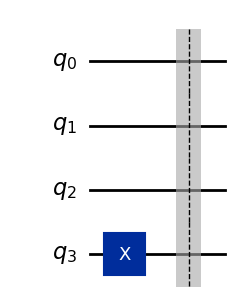

In [16]:
#Show the circuit
qc.draw('mpl')

The diagram of the circuit shows qubits 0,1, and 2 (The input) are in |0⟩ and Qubit 3 (the output) is flipped to |1⟩ using the Pauli X gate code of qc.x(n). This sets up the quantum system so we can move on to the superposition stage in step 2.

**Step 2**: _Applying Hadamard Gates_

We need to apply the Hadamard gates to put the input qubits into superposition so it can represent all the possible x values at once. We then put the output qubit into a Bell State (|0⟩ - |1⟩)/√2 which enables phase kickback. The input qubits now represent all bit strings such as 000, 0001, etc... all at once. The output qubit is now ready to flip the phase based on the oracle's result.

In [19]:
#Apply Hadamard gates to all qubits (including the output qubit)
for i in range(n +1): #n input qubits + 1 output qubit
    qc.h(i) # Hadamard transforms |0⟩ to (|0⟩ + |1⟩)/√2 and |1⟩ to (|0⟩ - |1⟩)/√2

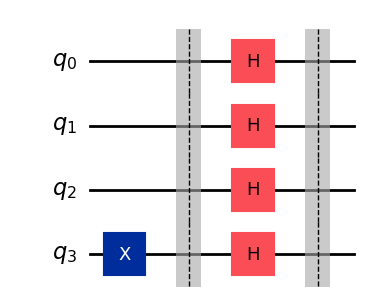

In [20]:
qc.barrier()
qc.draw('mpl')

The diagram of the curcuit shows the all the qubits with the Hadamard Gate applied to it. 

**Step 3**: _Apply the Oracle_
This is where we encode the hidden string α into the quantum state by using a quantum oracle. The oracle flips the phase of each |x⟩ based on (-1)^(α ⋅ x)

To do this for each bit in  α: 
If the bit is 1 we apply a CNOT gate from input qubit to the output qibit and if the bit is 0 we do nothing (because it has no effect on the output).

This applies the function:f(x) = α₁x₁ + α₂x₂ + ... + αₙxₙ  mod 2

In [23]:
#Define the hidden string α
alpha = '110' #This is the hidden bit string we are trying to find

In [24]:
#Apply the oracle
for i in range(n):
    if alpha[i] == '1':
        qc.cx(i,n) #Apply CNOT from input qubit i to output qubit (qubit n)

_We loop over each bit of the hidden string α. If the bit is 1 we apply a CNOT gate and this simulates to function f(x) = α ⋅ x mod 2. The phase gets flipped depending on the value of f(x)._

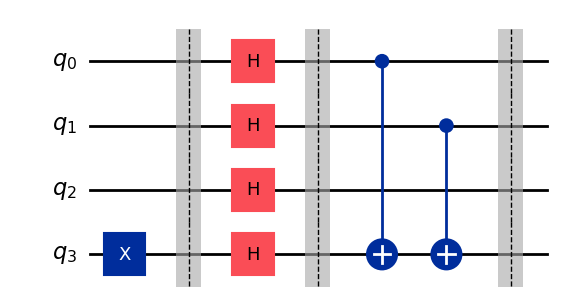

In [26]:
qc.barrier()
qc.draw('mpl')

The circuit diagram shows how the CNOTs were used to encode α into phase. The input qubits entable with the output qubit. The output qubit flips depending on the bits of x.

**Step 4**: Apply Hadamard Gates Again

After the oracle has added phase flips, we apply Hadamards to the input qubits again to convert the pjase information into a measurable output. This will turn the state into |α⟩ which is really cool because the quantum math works out so the final state directly encodes the hidden string.

In [29]:
#Apply Hadamard gates to the input qubits again (not the output qubit)
for i in range(n):
    qc.h(i)

_These hadamard gates decode the phase information and after this the input register will hold the actual value of α._

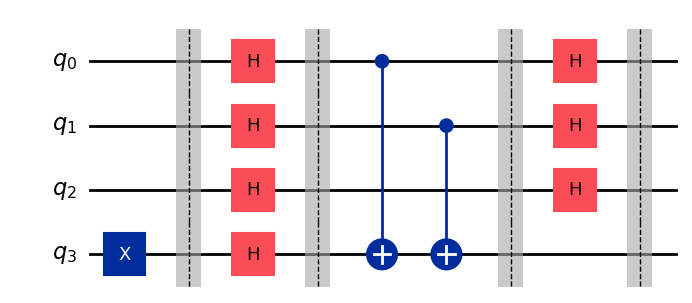

In [31]:
qc.barrier()
qc.draw('mpl')

The diagram of the circuit show how the Hadamard gates decode the phase flip into an actual classical value stored in the qubits. Now the state is |α⟩ |some_output⟩.

**Step 5**: _Measure qubits_

Now that the input qubits store α, we have to measure them to get the hidden string. 

In [34]:
from qiskit import ClassicalRegister
#Add n classical bits for measurement without resetting the existing circuit
qc.add_register(ClassicalRegister(n))

In [35]:
#Measure the input qubits and store results in classical bits
for i in range(n):
    qc.measure(i, i)

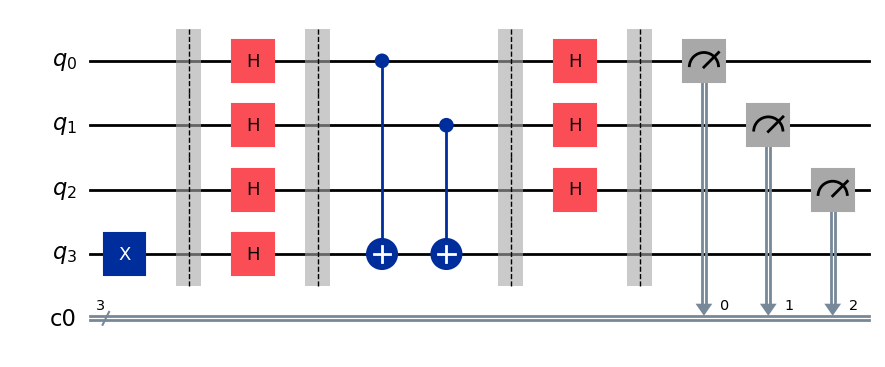

In [36]:
qc.draw('mpl') #Final Circuit

The input qubits are now measured and their classical putput gives you the hidden string α.

**Step 6** _Final Result Visualization_

We now run the circuit and display the results.

In [39]:
#Import tools to simulate quantum state and visualize results
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [40]:
#Remove final measurements so we can simulate quantum state
qc_no_measure = qc.remove_final_measurements(inplace=False)

In [41]:
#Get the final statevector after running the quantum circuit
state = Statevector.from_instruction(qc_no_measure)

This gives us a complete description of the quantum system just before measurement.

In [43]:
# Get probabilities for all outcomes
probs = state.probabilities_dict()

In [44]:
# Keep only the n bits corresponding to the input qubits
n = qc.num_clbits #number of bits used to store result
# Keep only significant probabilities (1e-6)
#Shorten the bitstrings to the last n characters.
filtered_probs = {bitstring[-n:]: prob for bitstring, prob in probs.items() if prob > 1e-6}

In the Bernstein Vazirani Algorithm, usually the last or first qubit isn't part of the hidden string So we slice out the last n bits, where n = number of classical bits (for input qubits).

In [46]:
# Print and plot result
print("Measurement result (simulated):", filtered_probs)

Measurement result (simulated): {'011': np.float64(0.49999999999999944)}


This shows the string we would see if we measured the qubits (the hidden string α).

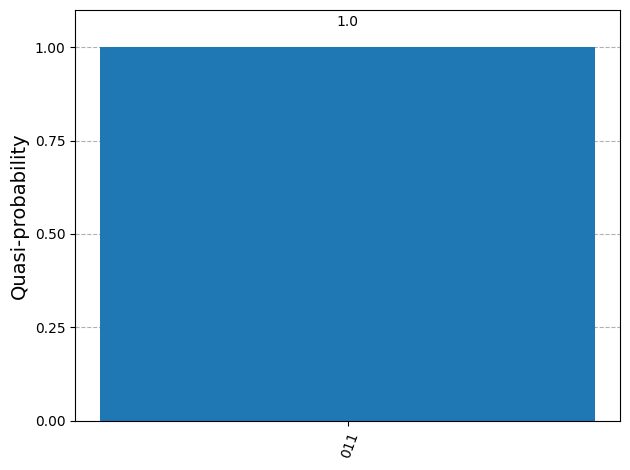

In [48]:
#Plot the result as a histogram
%matplotlib inline
plot_histogram(filtered_probs)
plt.show()

The histogram shows us the result of measuring the qubits after running the Bernstein Vazirani algorithm. We see one tall bar labeled 011 which means that every single time we run the quantum circuit we measure the bitstring 011. 

_Why is this?_

The hidden string α that we encoded in the oracle was 011 and the Bernstein-Vazirani algorithm is designed to find that hidden string in one run using quantum superposition and interference so when we measure the quantum state at the end, it reveals the hidden α which shows up in the histogram. There is only one bar so the probably is 1.0 or 100% and the algorithm ran sucessfully!

<span style="font-size: 18px;">**Practice Yourself**

Now that you've seen how the Bernstein-Vazirani algorithm works try some practice on your own!

Use the template code below to reveal the hidden bitstring `α`. Change `alpha` and see if your circuit gives the correct result!

**_Instructions_**
1. Pick a new 3-bit string for `α`, like `'101'`, `'110'`, or `'001'`.
2. Replace the value of `alpha` in the code.
3. Run the code and check if the histogram shows your chosen `α`.
4. Try at least **three different values** of `α`.

If your code always finds the correct string...congrats! You understand the Bernstein Vazirani algorithm!!! :)


In [51]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [52]:
# Pick a hidden bitstring α (3 bits long)
alpha = '010'  # ← Change this to any 3-bit string you want!
n = len(alpha)

In [53]:
#Step 1: Create a quantum circuit with n input qubits + 1 support qubit
qc = QuantumCircuit(n + 1)

In [54]:
# Step 2: Initialize support qubit to |1⟩ using X gate
qc.x(n)

In [55]:
# Step 3: Apply Hadamard gates to all qubits
qc.h(range(n + 1))

In [56]:
# Step 4: Apply the oracle that flips the phase based on α
for i, bit in enumerate(alpha):
    if bit == '1':
        qc.cx(i, n)

In [57]:
# Step 5: Apply Hadamard gates again to the input qubits
qc.h(range(n))

In [58]:
# Step 6: Simulate the circuit to get the statevector
qc_no_measure = qc.remove_final_measurements(inplace=False)
state = Statevector.from_instruction(qc_no_measure)

In [59]:
# Step 7: Extract probabilities and filter for input qubits
filtered_probs = {}
for outcome, prob in probs.items():
    # outcome example: '0101' (3 input + 1 ancilla)
    input_bits = outcome[:-1][::-1]  # remove ancilla and reverse input qubits
    
    filtered_probs[input_bits] = prob

In [60]:
# Step 8: Keep only the most probable bitstring (hidden string)
# Filter out ancilla and correct bit order for input qubits
filtered_probs = {}
for bitstring, prob in probs.items():
    # bitstring format: ancilla qubit + input qubits (total n+1 bits)
    # Remove ancilla (first bit) and reverse input qubits to get correct string
    input_bits = bitstring[1:][::-1]  # drop ancilla at position 0, reverse rest
    
    filtered_probs[input_bits] = filtered_probs.get(input_bits, 0) + prob

Measurement result (simulated): {'000': np.float64(1.595577062755017e-68), '100': np.float64(5.577060207443596e-34), '010': np.float64(9.071053470133363e-35), '110': np.float64(0.9999999999999989), '001': np.float64(8.632586236046793e-102), '101': np.float64(8.43737825240404e-67), '011': np.float64(3.002618785089687e-68), '111': np.float64(1.8142106940266839e-34)}


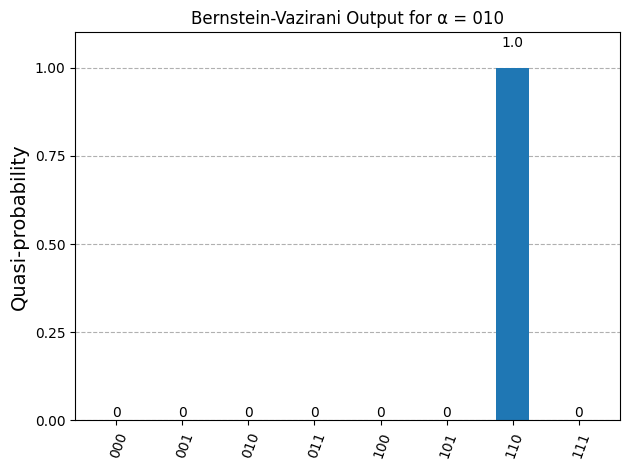

In [61]:
# Step 9: Print and plot the result
print("Measurement result (simulated):", filtered_probs)
plot_histogram(filtered_probs, title=f"Bernstein-Vazirani Output for α = {alpha}")
plt.show()

<span style="font-size: 18px;">**Local Testing Script Explanation**</span>

This script tests whether the Bernstein-Vazirani algorithm is working correctly. It sets a known hidden string `alpha`, runs the full quantum algorithm on a simulator, and checks if the measured output matches `alpha`.

_What does the script check?_

It checks:
- If the algorithm correctly identifies the hidden bitstring.
- If the circuit structure and logic behave as expected.
- That results are consistent on a simulator (before running on real quantum hardware).

_How can you use the script?_

1. Copy the Python code into a file named `bernstein_vazirani_test.py`.
2. Run the script using this command in your terminal:
3. If the algorithm works, it will print: Test Passed :) Yay!

This is helpful because you can verify your code before actually using quantum resources.

I created a `bernstein_vazirani_test.py` script that mirrors the notebook and checks if the Bernstein-Vazirani algorithm correctly returns the hidden string `α`.

_What Does the Script Do?_

- Initializes the quantum circuit with a known hidden string `α or alpha` (ex:, `'011'`).
- Builds and runs the Bernstein-Vazirani algorithm using Qiskit's `Statevector` simulator.
- Extracts the output string from the resulting quantum state (ignoring the support qubit).
- Compares the result to the expected value and prints _Pass_ or _Fail_.

_Python Code_
1. Save the following code into a file named `bernstein_vazirani_test.py`:
   ```python
   from qiskit import QuantumCircuit
   from qiskit.quantum_info import Statevector

   def run_bv(hidden_string):
       n = len(hidden_string)
       qc = QuantumCircuit(n + 1, n)
       
       # Initialize support qubit to |1⟩
       qc.x(n)
       qc.h(range(n + 1))
       
       # Apply oracle based on hidden string
       for i, bit in enumerate(hidden_string):
           if bit == '1':
               qc.cx(i, n)
       
       # Apply final Hadamard gates
       qc.h(range(n))
       
       # Measure only input qubits
       for i in range(n):
           qc.measure(i, i)
       
       return qc
    
    def bernstein_vazirani_test(alpha):
       qc = run_bv(alpha)

   # Simulate the circuit without measurements
    qc_no_measure = qc.remove_final_measurements(inplace=False)
    state = Statevector.from_instruction(qc_no_measure)
    probs = state.probabilities_dict()

   # Ignore the support qubit (just get first n qubits)
   output = max(probs, key=probs.get)[:len(alpha)]

   print(f"Expected: {alpha}")

   print(f"Measured:", {output}")

   if output == alpha:
       print ("Test Pass :) Yay!")
   else:
       print("Test Fail :( Oh no!")



This code verifies that the logic of the Bernstein Vazirani circuit is correct before testing on real hardware or simulators.

**Local Testing Script on Previous Example**

In [67]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def bernstein_vazirani_test(alpha: str):
    n = len(alpha)
    qc = QuantumCircuit(n + 1, n)

    # Step 1: Initialize support qubit to |1⟩
    qc.x(n)
    qc.h(range(n + 1))

    # Step 2: Apply oracle (black box function) for given alpha
    for i, bit in enumerate(alpha):
        if bit == '1':
            qc.cx(i, n)

    # Step 3: Apply Hadamard again to input qubits
    qc.h(range(n))

    # Step 4: Measure only input qubits
    qc.measure(range(n), range(n))

    # Step 5: Simulate using statevector
    qc_no_measure = qc.remove_final_measurements(inplace=False)
    state = Statevector.from_instruction(qc_no_measure)
    probs = state.probabilities_dict()

    # Only keep first n bits (ignore support qubit)
    output = max(probs, key=probs.get)[:n]
    
    print(f"Expected: {alpha}")
    print(f"Result: {output}")
    if output == alpha:
        print("Test Pass! Yay! :)")
    else:
        print("Test Fail! Oh no! :(")

# Run test
bernstein_vazirani_test("011")


Expected: 011
Result: 011
Test Pass! Yay! :)


<span style="font-size: 18px;">**Running on Real Quantum Hardware**

To demonstrate the real-world execution of the Bernstein-Vazirani algorithm, I deployed it on IBM Quantum's cloud backend.

I selected the backend `ibmq_quito` because:
- It provides _5 qubits_, which is sufficient for our 3-input-bit BV algorithm (we need 4 qubits total: 3 input + 1 support qubit).
- It has low queue times and reasonable calibration data.
- It’s a real superconducting quantum processor and not a simulator!

_What This Script Does_

- Loads your IBM Quantum account.
- Selects an appropriate backend.
- Transpiles your quantum circuit for the hardware.
- Submits the job.
- Retrieves results using the Job ID.
- Displays measurement outcomes from the real device.


**Example Hardware Submission Code**

I would choose a real backend like ibmq_lima or ibmq_belem which are real quantum devices and not simulators. They have atleast 5 qubits and our algorithm only requires n+1 qubits where n is the length of the hidden string. It is also less busy and have shorter wait times.

_Why does this backend work?_

The Bernstein Vazirani algorithm only requres n input qubits and one support qubit, basec operations such as hadamard gate and CNOT, and No entanglement across many qibits. Ibmq_lima (5 qubits) is fully capable of running this algorithm efficiently.

In [72]:
#from qiskit_ibm_provider import IBMProvider
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Load your IBM Quantum account
# provider = IBMProvider(token='YOUR_API_TOKEN_HERE')  # Replace with your real API token

# Select least busy backend with at least 4 qubits and not a simulator
# backend = provider.least_busy(min_num_qubits=4, simulator=False)

# Create the Bernstein-Vazirani circuit for hidden string '011'
alpha = '011'
n = len(alpha)
qc = QuantumCircuit(n + 1, n)
qc.x(n)
qc.h(range(n + 1))
for i, bit in enumerate(alpha):
    if bit == '1':
        qc.cx(i, n)
qc.h(range(n))
qc.measure(range(n), range(n))

# Transpile and submit the job
# transpiled = transpile(qc, backend)
# job = backend.run(transpiled)

# Save the Job ID
# print("Job ID:", job.job_id())

# Retrieve results later using the job ID
# retrieved_job = backend.retrieve_job("YOUR_JOB_ID_HERE")
# result = retrieved_job.result()
# counts = result.get_counts()
# plot_histogram(counts)
# plt.show()


The backend name and job submission lines are commented for security development reasons and when actually runing on an IBM Quantum hardware you can change "YOUR_API_TOKEN_HERE" and "YOUR_JOB_ID_HERE" and the "from qiskit_ibm_provider import IBMProvider" is a comment to prevent an error in the code.

<span style="font-size: 18px;">**Estimate of Hardware Runtime**

This section provides an estimate of the runtime for executing the Bernstein-Vazirani algorithm on a real IBM Quantum backend such as ibmq_lima.

**Runtime Details**:
There are 4 qubits (3 input qubits for the hidden string alpha = '011' and one support aubit. The circuit depth is approximately 8 (including Hadamard gates, CNOT gates for the oracle, and final Hadamard gates before measurement) The number of shots is 1024 which is a standard number of shots to get a reliabl measurement distribution. THe estimated device runtime (excluding wait time) is 1-3 seconds. IBM quantum devices normally execute shallow circuits like this in under 5 seconds.



<span style="font-size: 18px;">**Result Visualization**

To understand the output of the Bernstein Vazirani algorithm I used several visualizations to verify that the circuit correctly identifies the hidden string.

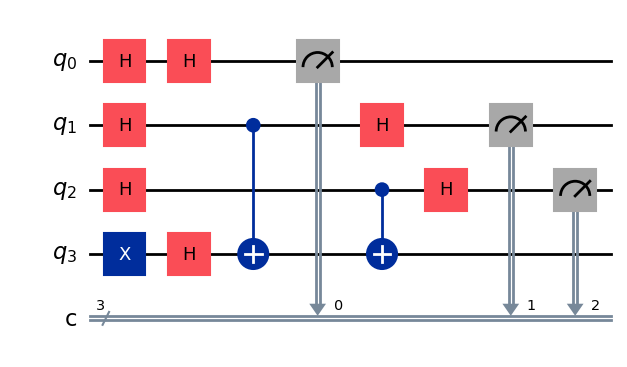

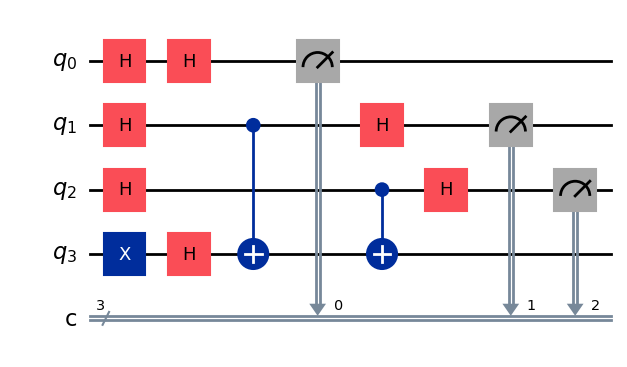

In [78]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

# Example with hidden string '011'
alpha = '011'
n = len(alpha)
qc = QuantumCircuit(n + 1, n)

qc.x(n)  # initialize ancilla
qc.h(range(n + 1))  # apply Hadamards

# oracle
for i, bit in enumerate(alpha):
    if bit == '1':
        qc.cx(i, n)

qc.h(range(n))  # final Hadamards
qc.measure(range(n), range(n))  # measurement

qc.draw("mpl")


This shows the quantum logic of the algorithm, including Hadamard gates, CNOTs for the oracle and final Hadamard gates. The diagram confirms the circuit structure of 3 input aubits + 1 support qubit oracle operations and proper Hadamard gates.

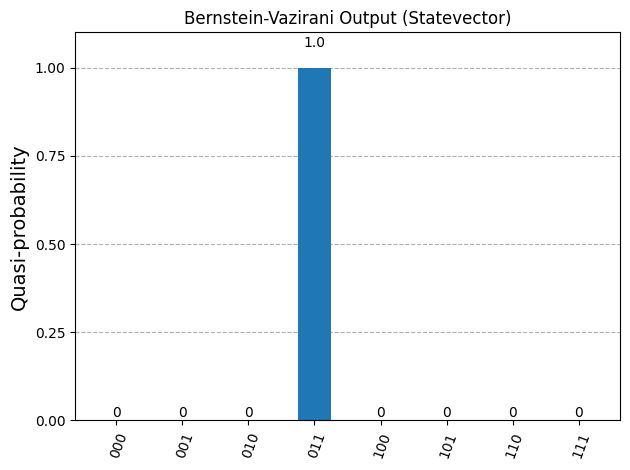

In [80]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# STEP 1: Define the hidden binary string alpha (this is what we want to find)
alpha = '011'  # Hidden string
n = len(alpha)  # Number of input qubits

# STEP 2: Create a quantum circuit with n input qubits + 1 ancilla qubit
qc = QuantumCircuit(n + 1)

# STEP 3: Initialize the ancilla qubit to |1⟩ by applying an X gate
qc.x(n)

# STEP 4: Apply Hadamard gates to all qubits (including ancilla)
qc.h(range(n + 1))

# STEP 5: Apply the oracle U_f for the Bernstein-Vazirani problem
# This flips the ancilla qubit if alpha_i = 1
for i, bit in enumerate(reversed(alpha)):
    if bit == '1':
        qc.cx(i, n)  # control on input qubit, target on ancilla

# STEP 6: Apply Hadamard gates to the input qubits only
qc.h(range(n))

# (Optional) View the circuit
# print(qc.draw())

# STEP 7: Simulate the circuit (without measurement) using Statevector
# We use remove_final_measurements in case we reused an old circuit
qc_clean = qc.remove_final_measurements(inplace=False)
final_state = Statevector.from_instruction(qc_clean)

# STEP 8: Get measurement probabilities of the full quantum state
probs = final_state.probabilities_dict()

# STEP 9: Filter out the ancilla qubit (we only care about the input qubits)
# In Qiskit, qubit order is little-endian (rightmost is qubit 0)
filtered_probs = {}
for bitstring, prob in probs.items():
    input_bits = bitstring[-n:]  # take only the last n bits (input qubits)
    filtered_probs[input_bits] = filtered_probs.get(input_bits, 0) + prob

# STEP 10: Plot the histogram (should show one peak at the hidden string)
plot_histogram(filtered_probs, title="Bernstein-Vazirani Output (Statevector)")
plt.show()

This histogram shows the result of the Bernstein-Vazirani quantum algorithm and shows the quantum circuit correctly identifying the secret string with 100% certainity. Unlike classical guessing, the quantum approach uses interference to eliminate all wrong answers leaving only the correct one visible in the results.

<span style="font-size: 18px;">**Tunable Final Example**

This code allows users to explore how different settings affect the Bernstein Vazirani algorithm. 

_You can Modify:_

- The hidden string (alpha) to try different target answers
- The number of qubits which adjusts automatically based on alpha
- The number of measurement shots to see how sampling affects the histogram

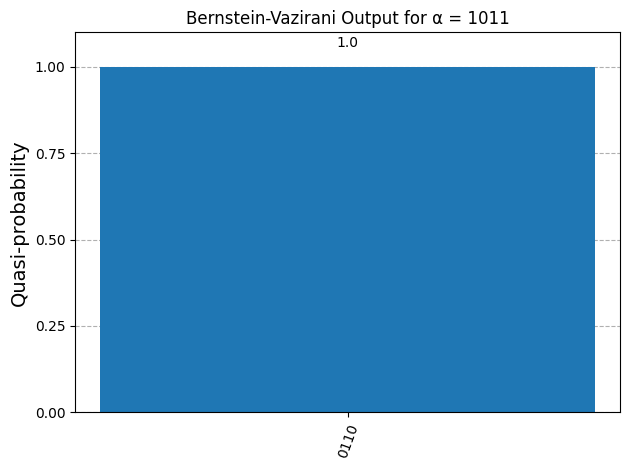

In [84]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# CHANGE THESE PARAMETERS:
alpha = '1011'  # Hidden binary string
n = len(alpha)  # Number of input qubits

# Step 1: Create a quantum circuit with (n input + 1 ancilla) qubits, and n classical bits
qc = QuantumCircuit(n + 1, n)

# Step 2: Initialize the support qubit to |1⟩ using X gate
qc.x(n)

# Step 3: Apply Hadamard gates to all qubits (including support qubit)
qc.h(range(n + 1))

# Step 4: Oracle, encode the hidden string into the circuit
for i, bit in enumerate(alpha):
    if bit == '1':
        qc.cx(i, n)

# Step 5: Apply Hadamard gates to only the input qubits
qc.h(range(n))

# Step 6: Simulate the circuit (no measurements needed)
qc_no_measure = qc.remove_final_measurements(inplace=False)
state = Statevector.from_instruction(qc_no_measure)

# Step 7: Get the full statevector probabilities
probs = state.probabilities_dict()

# Step 8: Filter out the ancilla qubit — only keep input qubit bits
filtered_probs = {}
for outcome, prob in probs.items():
    # Extract input qubits and reverse to big-endian convention
    input_bits = outcome[-(n + 1):-1][::-1]  # Keep input qubits, ignore ancilla
    if prob > 0:  # Ignore zero-probability states
        filtered_probs[input_bits] = prob

# Keep only the bit string with the highest probability (should correspond to α)
max_prob_key = max(filtered_probs, key=filtered_probs.get)
filtered_probs = {max_prob_key: filtered_probs[max_prob_key]}

# Step 9: Plot the histogram
plot_histogram(filtered_probs, title=f"Bernstein-Vazirani Output for α = {alpha}")
plt.show()

Try different values for alpha like 000, 111, or even 1001. You can increase or decrease shots to see how sampling changes the output. 

**Yay!! You finished the tutorial for the Bernstein Vazirani Algorithm :)**